## Milestone 1: Data Preparation & Initial Analysis

Importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing and reading dataset

In [14]:
df = pd.read_csv("C:\\Users\\ragav\\Downloads\\archive (1)\\GlobalWeather.csv")

Number of columns

In [15]:
df.shape

(89248, 41)

In [16]:
info = df.info()
head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89248 entries, 0 to 89247
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       89248 non-null  object 
 1   location_name                 89248 non-null  object 
 2   latitude                      89248 non-null  float64
 3   longitude                     89248 non-null  float64
 4   timezone                      89248 non-null  object 
 5   last_updated_epoch            89248 non-null  int64  
 6   last_updated                  89248 non-null  object 
 7   temperature_celsius           89248 non-null  float64
 8   temperature_fahrenheit        89248 non-null  float64
 9   condition_text                89248 non-null  object 
 10  wind_mph                      89248 non-null  float64
 11  wind_kph                      89248 non-null  float64
 12  wind_degree                   89248 non-null  int64  
 13  w

checking missing values

In [17]:
 missing_values=df.isnull().sum()
print("Missing values:\n", missing_values)
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print(f"No missing values are present in the Dataset.")

Missing values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

Counting and checking if there are any missing values in the data set

In [18]:
duplicates_count = df.duplicated().sum()

if df.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_count}")
else:
    print(f"No duplicates are present in the Dataset.")

No duplicates are present in the Dataset.


Aggregate to monthly Averages

In [19]:
columns_to_average = ['temperature_celsius' , 'wind_kph' , 'precip_mm' , 'humidity']
# Group by country, then resample by month-end frequency and calculate the mean
monthly_averages = df.groupby('country')[columns_to_average].mean()
print(monthly_averages.loc['India'])

temperature_celsius    31.846389
wind_kph               10.389278
precip_mm               0.068490
humidity               42.431072
Name: India, dtype: float64


In [20]:
df.describe(include=[np.number])

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,89248.000000,89248.000000,8.924800e+04,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,...,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000,89248.000000
mean,19.125645,22.171733,1.735724e+09,22.707034,72.874371,8.287213,13.340244,170.599588,1013.967002,29.941809,...,18.731472,516.953893,63.622043,15.503991,11.309147,26.210907,54.285865,1.760600,2.769138,50.775603
std,24.470628,65.837530,1.147823e+07,9.070481,16.326641,8.107275,13.045124,103.092084,11.741547,0.346677,...,15.039116,858.068433,32.947611,25.952700,42.093862,41.437680,163.931945,0.987166,2.586826,34.973626
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.725885e+09,18.000000,64.400000,4.000000,6.500000,82.000000,1010.000000,29.830000,...,10.600000,236.154000,43.000000,1.295000,0.800000,7.121000,10.545000,1.000000,1.000000,16.000000
50%,17.250000,23.316700,1.735727e+09,25.000000,77.000000,6.900000,11.200000,164.000000,1013.000000,29.920000,...,16.200000,327.100000,61.000000,4.500000,2.405000,14.985000,22.015000,1.000000,2.000000,52.000000
75%,40.400000,50.580000,1.745658e+09,28.400000,83.100000,11.400000,18.400000,257.000000,1018.000000,30.050000,...,24.800000,505.050000,81.000000,17.205000,9.065000,30.300000,46.900000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.755505e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [21]:
df.describe(include=[object])

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,89248,89248,89248,89248,89248,89248,89248,89248,89248,89248,89248
unique,210,248,196,15030,47,16,458,544,1441,1441,8
top,Bulgaria,Kabul,Asia/Bangkok,2024-11-04 10:00,Partly cloudy,E,06:17 AM,06:28 PM,No moonrise,No moonset,Waxing Gibbous
freq,950,459,1783,44,28336,8552,926,862,3097,2912,20156


In [12]:
#Standardizing country names
df['country'] = df['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df['country'] = df['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)

## Milestone 2: Core Analysis & Visualization Design

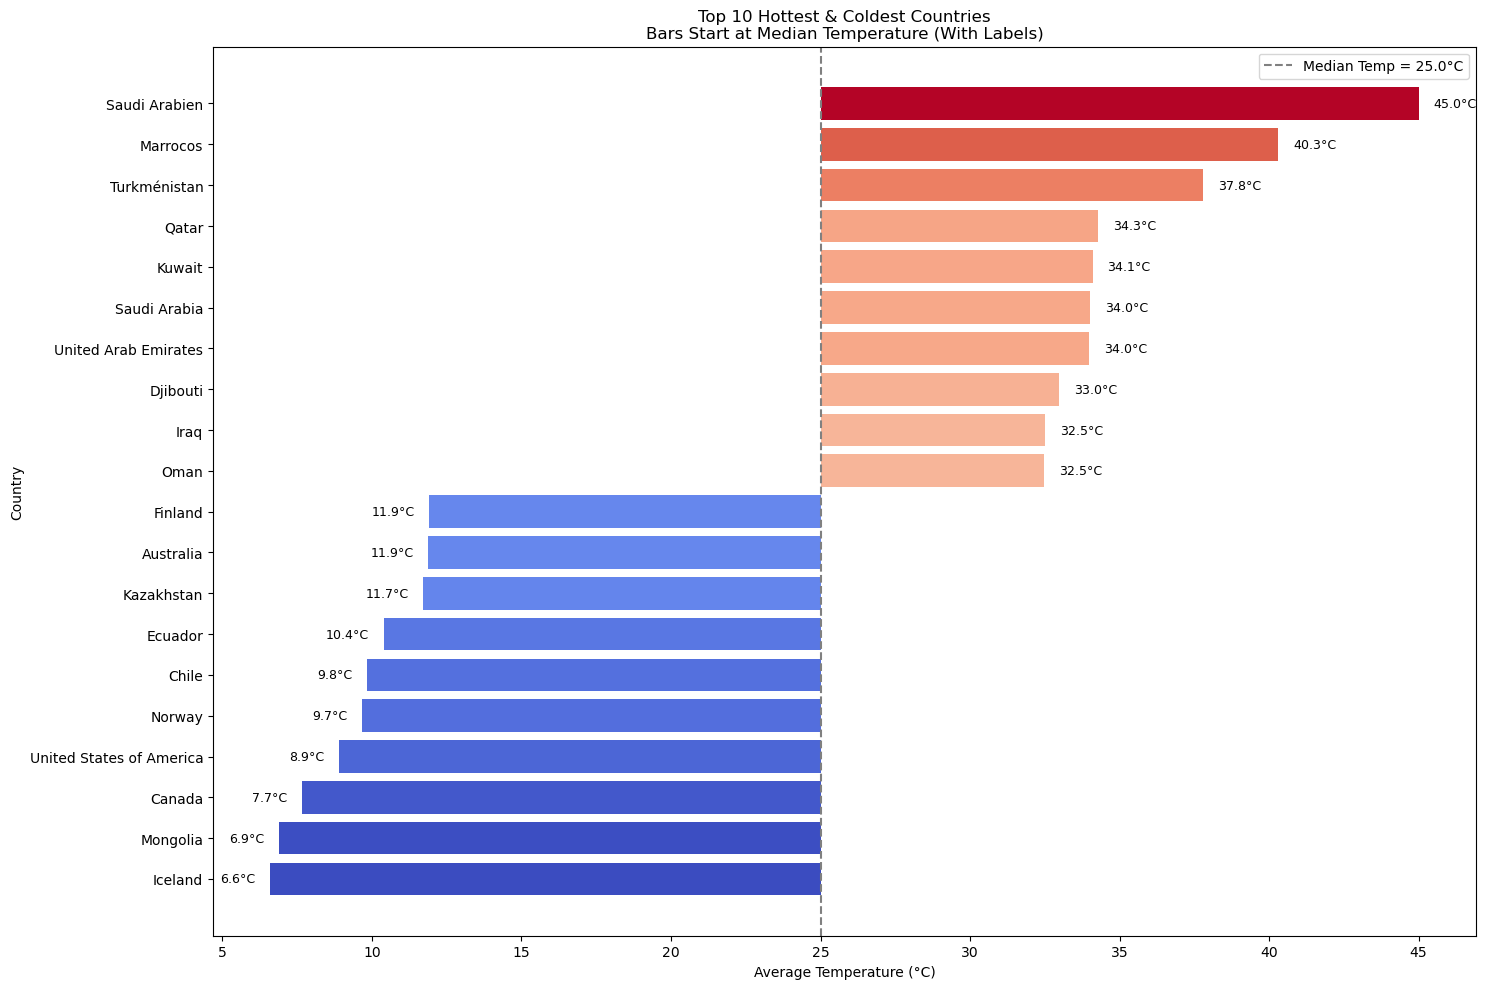

In [7]:
country_avg_temp = df.groupby('country')['temperature_celsius'].mean().sort_values()
overall_median = df['temperature_celsius'].median()

coldest_countries = country_avg_temp.head(10)
hottest_countries = country_avg_temp.tail(10)
extreme_countries = pd.concat([coldest_countries, hottest_countries])

temperature_diff = extreme_countries - overall_median

norm = plt.Normalize(country_avg_temp.min(), country_avg_temp.max())
colors = plt.cm.coolwarm(norm(extreme_countries.values))


plt.figure(figsize=(15, 10))
bars = plt.barh(
    y=extreme_countries.index,
    width=temperature_diff.values,
    left=overall_median,
    color=colors
)
for idx, (country, avg_temp) in enumerate(extreme_countries.items()):
    x_offset = 0.5 if avg_temp >= overall_median else -0.5
    ha = 'left' if avg_temp >= overall_median else 'right'
    plt.text(
        x=avg_temp + x_offset,
        y=idx,
        s=f"{avg_temp:.1f}°C",
        va='center',
        ha=ha,
        fontsize=9
    )

plt.axvline(overall_median, color='gray', linestyle='--', label=f'Median Temp = {overall_median:.1f}°C')
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Country")
plt.title("Top 10 Hottest & Coldest Countries\nBars Start at Median Temperature (With Labels)")
plt.legend()
plt.tight_layout()
plt.show()

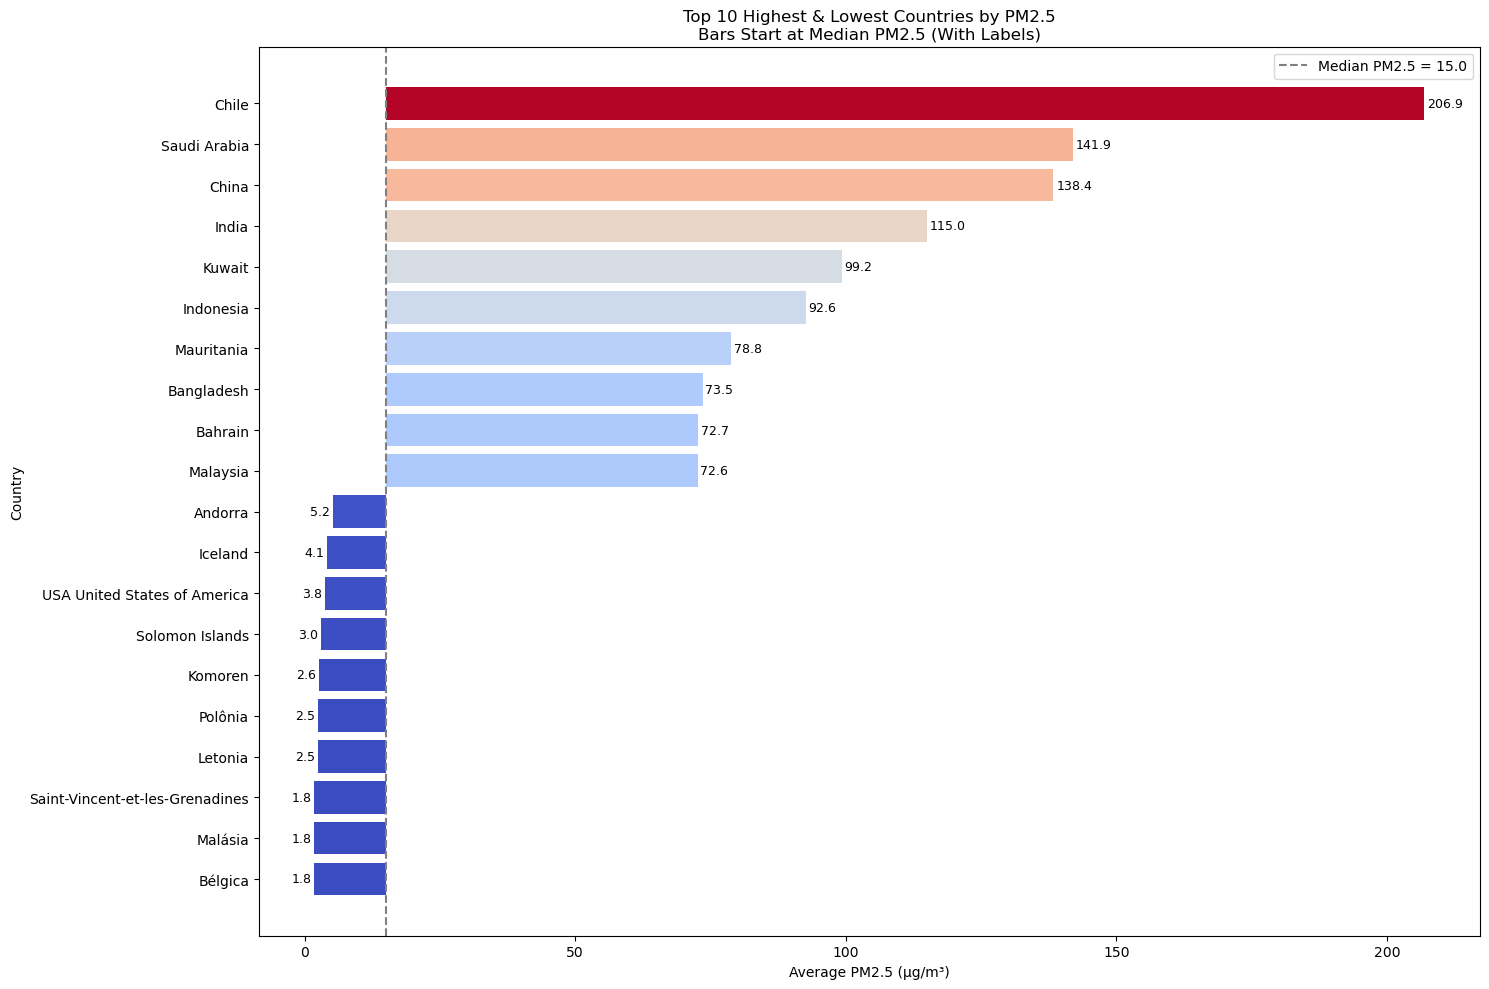

In [8]:
country_avg_pm25 = df.groupby('country')['air_quality_PM2.5'].mean().sort_values()
overall_median_pm25 = df['air_quality_PM2.5'].median()
lowest_pm25_countries = country_avg_pm25.head(10)
highest_pm25_countries = country_avg_pm25.tail(10)
extreme_pm25_countries = pd.concat([lowest_pm25_countries, highest_pm25_countries])
pm25_diff = extreme_pm25_countries - overall_median_pm25
norm_pm25 = plt.Normalize(country_avg_pm25.min(), country_avg_pm25.max())
colors_pm25 = plt.cm.coolwarm(norm_pm25(extreme_pm25_countries.values))

plt.figure(figsize=(15, 10))
bars = plt.barh(
    y=extreme_pm25_countries.index,
    width=pm25_diff.values,
    left=overall_median_pm25,
    color=colors_pm25
)

for idx, (country, avg_pm25) in enumerate(extreme_pm25_countries.items()):
    x_offset = 0.5 if avg_pm25 >= overall_median_pm25 else -0.5
    ha = 'left' if avg_pm25 >= overall_median_pm25 else 'right'
    plt.text(
        x=avg_pm25 + x_offset,
        y=idx,
        s=f"{avg_pm25:.1f}",
        va='center',
        ha=ha,
        fontsize=9
    )

plt.axvline(overall_median_pm25, color='gray', linestyle='--', label=f'Median PM2.5 = {overall_median_pm25:.1f}')
plt.xlabel("Average PM2.5 (μg/m³)")
plt.ylabel("Country")
plt.title("Top 10 Highest & Lowest Countries by PM2.5\nBars Start at Median PM2.5 (With Labels)")
plt.legend()
plt.tight_layout()
plt.show()